In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline

/home/michael/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
diabates = pd.read_csv("datasets/pima-indians-diabetes.csv")
diabates.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


### 1. Normalize numerical columns


In [3]:
diabates.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [4]:
numerical_cols = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
                  'Insulin', 'BMI', 'Pedigree']
diabates[numerical_cols] = diabates[numerical_cols].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [5]:
# observe all columns are normalized
diabates[numerical_cols].head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638


### 2. Define list of feature columns

In [6]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
gluc_conc = tf.feature_column.numeric_column('Glucose_concentration')
dias_pres = tf.feature_column.numeric_column('Number_pregnant')
bp = tf.feature_column.numeric_column('Blood_pressure')
triceps = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

### Dealing with categorical variables
There are 2 methods used to deal with categorical variables.
1. Using Hash Bucket: This is similar to using scikit learn's FeatureHasher. Use this when you don't know the exact values of the features that will occur. Input is just the number of buckets to hash on. This can be lesser than the number of features. 

2. Using Vocabulary List: This is like using scikit learn's DictVectorizer. Use this when you know the features that are going to be included like "A", "B", "C", "D".

In [7]:
# Using vocabulary list. 
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list("Group", ["A", "B", "C", "D"])

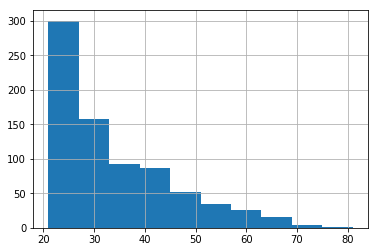

In [8]:
# Histogram of ages
diabates["Age"].hist(bins=10)

In [9]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20, 30, 40, 50, 60, 70, 80])

In [10]:
feat_cols = [num_preg, gluc_conc, dias_pres, bp, triceps, insulin, bmi, pedigree, age, age_buckets]

In [11]:
y = diabates["Class"]

In [12]:
X = diabates.drop("Class", axis=1)

### Prepare dataset

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [14]:
input_function = tf.estimator.inputs.pandas_input_fn(X, y, batch_size=8, shuffle=True)

In [ ]:
estimator = tf.estimator